# Flights Data Exploration
## by Tanmaya Chaudhary

## Investigation Overview

> I chose flights data in 2008 in order to investigate the carrier performances in flight industry in the United states. My major focus is to define and engineer key parameters based on this data set in order to rate unique flight carriers, so that we can identify the worst and the best carriers.

## Dataset Overview

> There are 7009728 rows of flights details in the data set for the year 2008, with 29 features, including cancellations and delay data for 20 unique carriers. For the univariate investigation, I used the data set as it is as a data frame. However, for the bivariate and for the multivariate investigation, I used an engineed data frame from the main data frame.
<br>
> The engineered data frame consisted of details of individual carriers such as, total number schedulled flights, total cancellations and total number of delays by the carriers, total delay in minutes and delay per flight operated. 

In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df = pd.read_csv('modified_2008.csv') # for univariate
df_f = pd.read_csv('carrier_sorted_2008.csv') # for bivariate and multivariate

## Distribution of Flights Schedulled in 2008 for Airline Carriers

> This is the distribution of number of flights schedulled for the 20 ariline carriers in 2008. Sothwest airline has contributed 17.1% and it is almost double the contribution by the second highest carrier, American airline. The lowest contributor is Aloha airline with a 0.1% contribution.

In [3]:
#Set visualization style
sb.set_style('whitegrid')
sb.set_context("talk")

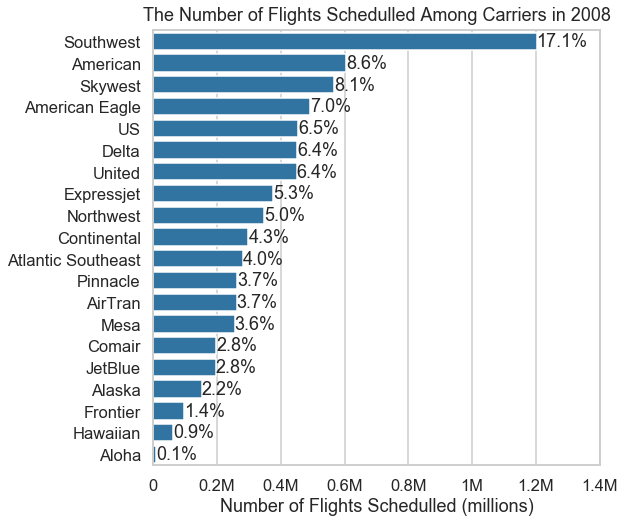

In [4]:
# Use descending order of number of schedulled flights
f_order = df.UniqueCarrier.value_counts().index

# Set figure size
plt.figure(figsize = (8, 8))

# Create a color palette
base_color = sb.color_palette()[0]

# Create a countplot for the column UniqueCarrier
sb.countplot(data = df, y = 'UniqueCarrier', color = base_color, order = f_order);

# Change y-axis label
plt.ylabel('Carrier Name')

# Set x-axis limit
plt.xlim(0, 1400000)

# Set x-axis ticks
plt.xticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000],
           [0, '0.2M', '0.4M', '0.6M', '0.8M', '1M', '1.2M', '1.4M'])

# Remove y-label
plt.ylabel('')

# Set title
plt.title('The Number of Flights Schedulled Among Carriers in 2008',
         pad = 10)

# Change x-label
plt.xlabel('Number of Flights Schedulled (millions)')

# Show percentages of flights schedulled by carriers
flight_counts = df.UniqueCarrier.value_counts()
for i in range(flight_counts.shape[0]):
  count = flight_counts[i]
  pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
  plt.text(count+20, i, pct_string, va = 'center');

## Overall Flight Cancellations in 2008

> Over 7 million flights schedulled in 2008, 98% have been operated and 2% have been cancelled.

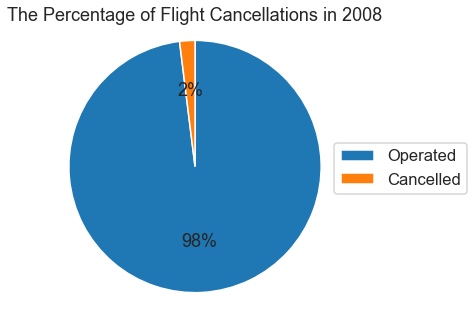

In [5]:
# Set figure size
plt.figure(figsize = (5, 5))

# Set data
sorted_counts = df['Cancelled'].value_counts()

# Set legend labels
labels = 'Operated', 'Cancelled'

# Plot the pie
plt.pie(sorted_counts, startangle = 90,
        counterclock = False, autopct = '%1.f%%',
        radius = 1);

# Set axis
plt.axis('equal')

# Set legend labels
plt.legend(labels = labels, loc = (1, 0.4))

# Set title
plt.title('The Percentage of Flight Cancellations in 2008',
         pad = 10);

## Distribution of Cancellation Types

> There are four types of cancellations and this graph shows the distribution of them. Both weather and carrier cancellations are almost equal and summed up to about 80% of overall cancellations.

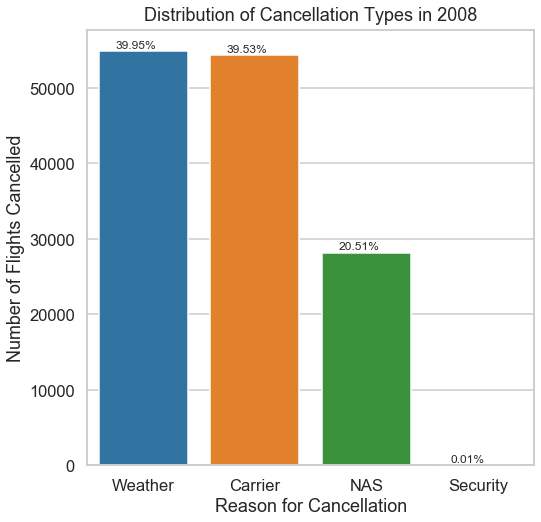

In [6]:
# Set figure size
plt.figure(figsize = (8, 8))

# Use descending order of number of schedulled flights
order = df.CancellationCode.value_counts().index

# Create a countplot for the column UniqueCarrier
sb.countplot(data = df, x = 'CancellationCode', order = order);

# Change x-axis label
plt.xlabel('Reason for Cancellation')

# Change y-axis label
plt.ylabel('Number of Flights Cancelled')

# Change x-ticks
ind = np.arange(4)
plt.xticks(ind, ('Weather', 'Carrier', 'NAS', 'Security'))

# Set title
plt.title('Distribution of Cancellation Types in 2008',
         pad = 10)

# Show percentages of flights schedulled by carriers
code_counts = df.CancellationCode.value_counts()
for i in range(code_counts.shape[0]):
  count = code_counts[i]
  pct_string = '{:0.2f}%'.format(100*count/df[df.Cancelled == 1].shape[0])
  plt.text(i-0.25, count+400, pct_string, fontsize = 12);

## Comparison of Flight Cancellations by Carriers
> Calulated number of cancellations per 100 flights schedulled by the carrier are compared here. American Eagle airline has the highest percentage of about 3.7% and the lowest is owned by Frontier Airline.


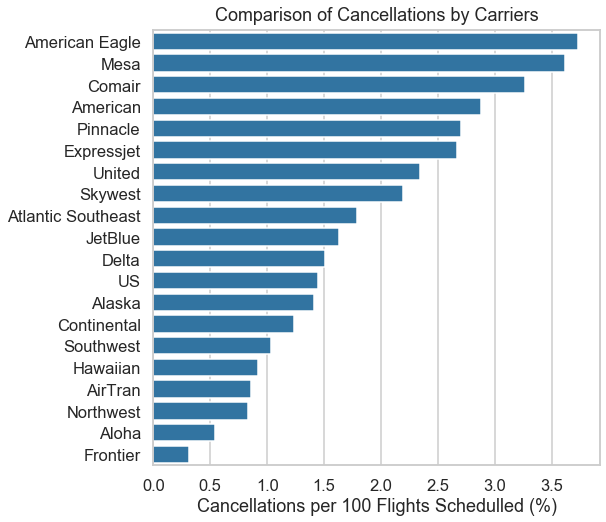

In [7]:
# Set figure size
plt.figure(figsize = (8, 8))

# Plot pct_cancelled for each carrier
base_color = sb.color_palette()[0]
pct_cancelled = df_f.sort_values('pct_cancelled', ascending = False)
sb.barplot(x = 'pct_cancelled', y = 'carrier_name', data = pct_cancelled, color = base_color);

# Change x-axis label
plt.xlabel('Cancellations per 100 Flights Schedulled (%)')

# Change y-axis label
plt.ylabel('')

# Set title
plt.title('Comparison of Cancellations by Carriers',
         pad = 10);

## Comparison of Flight Delayes by Carriers
> Calulated number of delayes per 100 flights operated by the carrier are compared here. Atlantic Southwest airline has the highest percentage of about 13% and the lowest of about 3% is recorded by Aloha Airline.


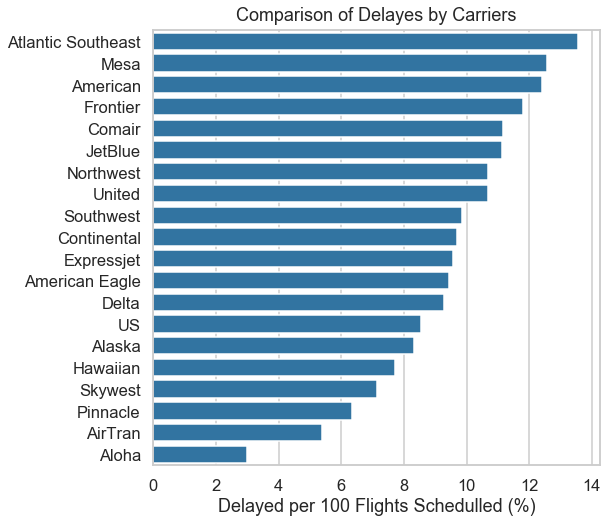

In [8]:
# Set figure size
plt.figure(figsize = (8, 8))

# Set color
base_color = sb.color_palette()[0]

# Set data
pct_delayed = df_f.sort_values('pct_delayed', ascending = False)

# Plot data
sb.barplot(x = 'pct_delayed', y = 'carrier_name', data = pct_delayed, color = base_color);

# Change x-axis label
plt.xlabel('Delayed per 100 Flights Schedulled (%)')

# Change y-axis label
plt.ylabel('')

# Set title
plt.title('Comparison of Delayes by Carriers',
         pad = 10);

## Comparison of Delay Time by Carriers
> Calulated delay time in minutes per flight operated by the carriers are compared here. Mesa airline has the highest close to 8 min while Aloha airline has the lowest closer to 1 min.


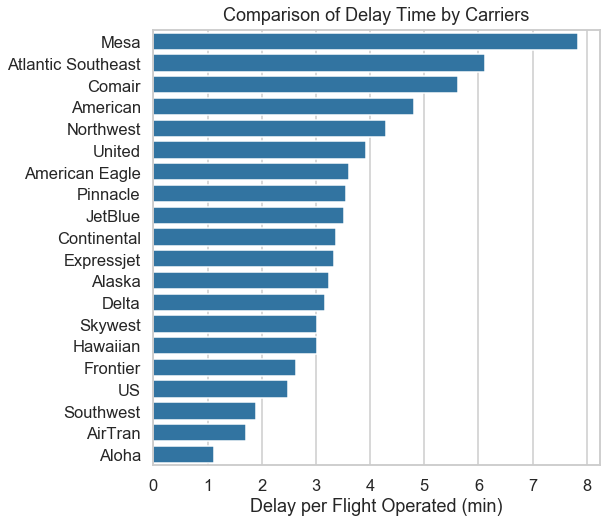

In [9]:
# Set figure size
plt.figure(figsize = (8, 8))

# Set color
base_color = sb.color_palette()[0]

# Set data
delay_pf = df_f.sort_values('delay_per_flight', ascending = False)

# Plot data
sb.barplot(x = 'delay_per_flight', y = 'carrier_name', data = delay_pf, color = base_color);

# Change x-axis label
plt.xlabel('Delay per Flight Operated (min)')

# Change y-axis label
plt.ylabel('')

# Set title
plt.title('Comparison of Delay Time by Carriers',
         pad = 10);

## Comparison of Carrier Performances in 2008
> Here I have compared the carriers by their percent cancellations, percent delays and delay time per flight.
The worst airline carrier in 2008 is Mesa airline. They have the highest delay time per flight and second highest in both percent cancellations and delayes.
The best airline is Aloha air line and they recorded the lowest in both delay per flight and percent delayes while being the second lowest in percent cancellations.


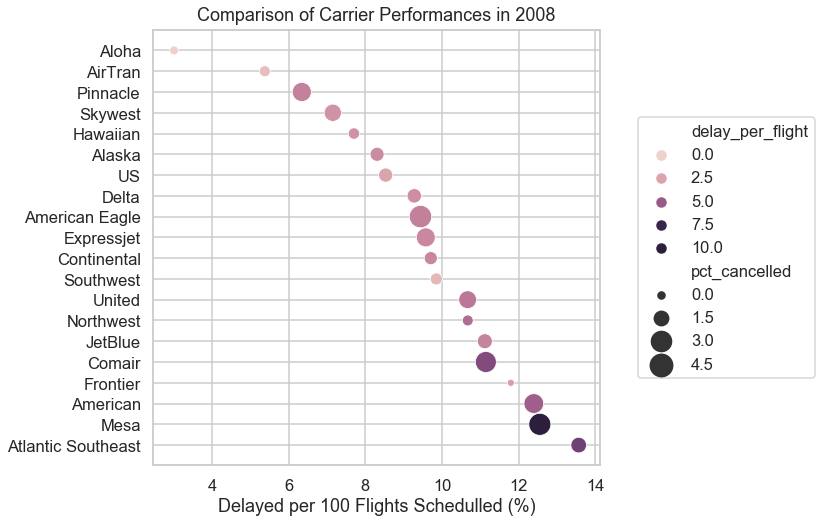

In [10]:
# Set figure size
plt.figure(figsize = (8, 8))

# Set data
cmap = sb.cubehelix_palette(as_cmap=True)
pct_delayed = df_f.sort_values('pct_delayed', ascending = False)

# Plot data
sb.scatterplot(data =pct_delayed, x = 'pct_delayed', y = 'carrier_name',
              hue = 'delay_per_flight', size = 'pct_cancelled', palette = cmap,
              sizes = (50, 500), hue_order = (5, 100));
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)

# Change x-axis label
plt.xlabel('Delayed per 100 Flights Schedulled (%)')

# Change y-axis label
plt.ylabel('')

# Set title
plt.title('Comparison of Carrier Performances in 2008',
         pad = 10);